# Introduction to Python programming for data journalism

## COMM318 Fall 2019 (08/27/19)

### Instructor: Matt O'Donnell (mbod@asc.upenn.edu)


### Course Overview

* This notebook uses a dataset from OpenDataPhilly on vehicular crashes to demonstrate the range of analytic techniques and programming skills we will learn in this course.


------

# Why learn programming and data analysis skills for making stories from data?
## Testing data in stories, finding stories in data and making stories from data

* In the era of _big data_ we frequently encouter stories in various forms of media that make assertions and claim to be based on the analysis of large datasets. It is often possible to access and analyze the data of relevance behind these stories. This allows us, for example, to test the claims, the focus and framing of a news article reporting. While there a number of online tools to explore and visualize open datasets, developing programming skills will allow you greater flexibility and the ability to filter, group and combine data in anticipated and unsupported ways.


* As more and more data is available it becomes vital for more people to acquire and spread the skills for handling these data beyond just a handful of data storytelling experts and media sources. There has been lots of discussion of _open data_ and _data democratization_ (both within private and public realms) espousing the benefits of making data available to "everyone" beyond its traditional management and analysis by IT departments and statisticans. One element of this is making the data available and easily accesible. But equally (if not _more_) important than this is having ability to analytically handle these datasets. While it would be a mistake to suggest that learning programming __and__ data analysis is a trival or quick thing to do. It is certainly not beyond the reach of motivated individuals and there are many resources available to teach programming languages, such as Python and R. One might even argue that it is the responsibility of modern citzens to become data literate and this should include acquiring some basic data analysis and programming skills.


* Having the ability to acquite, analyze and to discover and interpret patterns in data means that more stories can be told beyond the core of those selected by traditional media sources for broad appeal, political, commercial and other reasons.


* As students of communication theory we know that effective and persausive communication is not just about sharing the right (or true) information but also about how you select from, order and present (frame) this information. This becomes all the more crucial as the amount data increases. A fundamental skill for telling stories from data is first being able to identify the stories __in__ data. These might be found by describing and summarizing what is there, identifying trends over time or in making comparisons between different groups, categories and factors, and so on. These stories in data then become the components of the larger story you can tell from the data.


* Data journalism or data storytelling requires skills in:
    * some programming 
    * data analysis and visualization
    * identifying patterns (stories) in data 
    * telling stories from these patterns





# Example: Analyzing vehicular crash data for Philadelphia 2007-2017

* Here we make use of data made available on www.opendataphilly.org derived from the annual crash data compiled by Penn DOT for Pennsylvania.
   * https://www.opendataphilly.org/dataset/vehicular-crash-data
   


### 0. Setup notebook

* The first Python code in a notebook should include all the modules and functions that you need to use for the analysis. These are grouped together at the top and not scattered throughout the notebook to make it clearer and more reproducible.


* For data analysis we are going to use a popular and powerful code library called `pandas` (https://pandas.pydata.org/) that provides data structures and functionality optimized for data analysis and particularly for working with data in the form of a table.

In [101]:
1+2

3

In [102]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

### 1. Load the data

* We will look at some of the most common data formats used to store data in files. Here we have downloaded the CSV (comma separated value) format version of the vehicular crash data. 


* Here is a subset of the data with 7 recorded crashes and a small handful of the features recorded about each crash:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>day_of_week</th>      <th>county_name</th>      <th>collision_type</th>      <th>dec_lat</th>      <th>dec_long</th>    </tr>  </thead>  <tbody>    <tr>      <td>3</td>      <td>Philadelphia</td>      <td>1</td>      <td>40.0446</td>      <td>-75.0547</td>    </tr>    <tr>      <td>5</td>      <td>Philadelphia</td>      <td>4</td>      <td>39.9693</td>      <td>-75.1432</td>    </tr>    <tr>      <td>7</td>      <td>Philadelphia</td>      <td>4</td>      <td>40.0490</td>      <td>-75.0707</td>    </tr>    <tr>      <td>6</td>      <td>Philadelphia</td>      <td>6</td>      <td>39.9034</td>      <td>-75.1504</td>    </tr>    <tr>      <td>4</td>      <td>Philadelphia</td>      <td>1</td>      <td>40.0512</td>      <td>-74.9892</td>    </tr>    <tr>      <td>6</td>      <td>Philadelphia</td>      <td>8</td>      <td>39.9352</td>      <td>-75.1542</td>    </tr>    <tr>      <td>4</td>      <td>Philadelphia</td>      <td>4</td>      <td>40.0811</td>      <td>-75.0391</td>    </tr>  </tbody></table>


* The CSV format is a simple text format organized with one line for each instance (i.e. a crash) and each feature or data point about the crash (i.e. number of people involved, time of day, kind of injuries, etc.) is separated by a comma. The first line of the file usually contains the names of features. 


* A CSV representation of the table above is:

```
day_of_week,county_name,collision_type,dec_lat,dec_long
3,Philadelphia,1,40.0446,-75.0547
5,Philadelphia,4,39.9693,-75.1432
7,Philadelphia,4,40.049,-75.0707
6,Philadelphia,6,39.9034,-75.1504
4,Philadelphia,1,40.0512,-74.9892
6,Philadelphia,8,39.9352,-75.1542
4,Philadelphia,4,40.0811,-75.0391
```

#### _Key point_

* A **fundamental point** to take on right at the beginning is that it is here in things a mundane as the data format that we begin to look for the stories in data. It is easy to rush through the steps of acquiring and loading a big data set in order to push it through a data analysis and visualization pipeline or tool, without stopping to think about what each row and column represents. 

    * Here each row is an incidence of a crash, which for the individuals involved is a major and serious life event and sadly perhaps a life threatening or life ending event. This event is a story located a particular time and place. 
    * Then the columns represent the potential narrative foci as we begin to group together one, two, ten, 300, thousands of these crash incidents. 
        * What times of day do crashes most often occur?
        * Are there particularly intersections where a lot of crashes occur?
        * When a bicycle is involved are the injuries more serious then two or more cars?

#### Load the data

* We use the `pd.read_csv()` function to read the data from the CSV file into a data structure called a __data frame__. 


* A data frame is a table structure with:
    * `Rows` (each line in the CSV file, i.e. a crash)
    * `Columns` (each of the features recorded in the CSV file about crashes)
    * `An index` (a unique way of identifying and accessing each of the rows)

In [103]:
crash_data = pd.read_csv('data/crash_data_collision_crash_2007_2017.csv')

### 2. Inspect the data

* The first step is always to try to get a sense of the size (dimensions), type and quality of the data.


* Key questions include:
    * How many rows (observations) does it have?

    * How many columns (different types of features) are there?

    * How comprehensive and varied are these features across the dataset?
        * For example, there may be a column that records whether a deer is involved in the crash. But for Philadelphia city crashes this is likely to most often be 0 or not recorded. And it is therefore probably not the story we are going to tell!

    * Are there missing values?
    
    
* A pandas `DataFrame` is a Python __OBJECT__ that has:
    * attributes - sequences of data
    * functions - sets of operations or steps that can be applied to these data
 
 (do not worry about this terminology or what it means at the moment!)
 
 
* The `.shape` attribute gives the dimensions of the `DataFrame` and reports the number of rows first, followed by the number of columns.

In [23]:
crash_data.shape

(77462, 90)

#### _Key point_

* So we have almost 800,000 accidents involving vehicles recorded in a ten year period. 
    * That is a large number! 
    * There are stories to be told.
    * Don't forget the human side of what these numbers represent.
    
    
* There are 90 columns. So each crash incident had a range of features noted. Understanding what these features are is vital to being able to find the stories in the data.
    
 
* The size of the data necessitates that we approach it computationally and quantitatively, that is, we cannot try and read it row by row! However, it is good practice to do some visual spot checks as a way to familiarize yourself with the data.


* Pandas `DataFrame`s have various functions for this:
    1. `.head()` will display the first `n` rows of the data frame (default n=5).
    2. `.tail()` will display the last `n` rows of the data (default n=5).
    3. `.sample(n)` will select a random sample of `n` rows of the data.

In [24]:
crash_data.head()

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
0,,9498,2016019772,6,67,67301,2016,2,2,1515,...,0,1,0,0,3,0,40.0628,-75.0577,,
1,,9570,2016013724,6,67,67301,2016,1,3,1100,...,0,0,0,0,3,0,40.0822,-74.9669,,
2,,9642,2016038282,6,67,67301,2016,3,5,632,...,0,0,0,0,0,1,39.9751,-75.1946,,
3,,9714,2016052220,6,67,67301,2016,2,5,1900,...,0,0,0,0,8,0,40.0357,-75.2171,,
4,,9786,2016087187,6,67,67301,2016,8,6,1535,...,0,1,0,0,4,0,39.9511,-75.1721,,


* Notice that because there are 90 columns in the data frame only the first and last ten are displayed (`...` indicates where the other 70 are).


* By default the columns are shown in the order they appear in the underlying CSV file.

In [34]:
crash_data.tail()

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
77457,,77458,2012004815,6,67,67301,2011,12,5,1250,...,0,0,0,0,0,0,39.9849,-75.2368,,
77458,,77459,2011115410,6,67,67301,2011,10,6,759,...,0,0,0,0,8,0,40.0270,-75.0654,,
77459,,77460,2011118190,6,67,67301,2011,10,3,9999,...,0,0,0,0,8,1,40.0021,-75.1678,,
77460,,77461,2011118469,6,67,67301,2011,10,5,1600,...,0,1,0,0,8,0,40.0154,-75.0679,,
77461,,77462,2011132575,6,67,67301,2011,12,7,1238,...,0,0,0,0,4,0,39.8820,-75.2455,,


In [35]:
crash_data.sample(10)

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
5839,,5832,2017067951,6,67,67301,2017,6,5,1408,...,0,0,0,0,9,0,40.0319,-75.0879,,Philadelphia
65504,,65505,2012064019,6,67,67301,2012,5,5,1530,...,0,1,0,0,4,0,39.9563,-75.2295,,
33407,,33408,2015131259,6,67,67301,2015,11,3,1730,...,0,0,0,0,4,0,40.0513,-75.0799,,
29243,,29244,2015081062,6,67,67301,2015,7,2,9999,...,0,0,0,0,0,0,39.9945,-75.0980,,
76501,,76502,2011126265,6,67,67301,2011,11,3,1719,...,0,1,0,0,3,0,40.0501,-75.1423,,
42650,,42651,2014122436,6,46,46102,2014,11,2,1140,...,0,0,0,0,4,0,40.0653,-75.0904,,
1427,,1420,2017008876,6,67,67301,2017,1,1,2032,...,0,0,0,0,0,0,39.9281,-75.1962,,Philadelphia
23372,,23373,2015028800,6,67,67301,2015,2,1,1924,...,0,0,0,0,8,0,39.9860,-75.1415,,
68278,,68279,2012122357,6,67,67301,2012,11,1,1506,...,0,0,0,0,4,0,40.0715,-75.1863,,
63066,,63067,2012068724,6,67,67301,2012,6,1,900,...,0,0,0,0,4,0,40.0532,-75.1387,,


* The `head` and `tail` functions can also take an argument for the number of rows to return.

In [25]:
crash_data.head(20)

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
0,,9498,2016019772,6,67,67301,2016,2,2,1515,...,0,1,0,0,3,0,40.0628,-75.0577,,
1,,9570,2016013724,6,67,67301,2016,1,3,1100,...,0,0,0,0,3,0,40.0822,-74.9669,,
2,,9642,2016038282,6,67,67301,2016,3,5,632,...,0,0,0,0,0,1,39.9751,-75.1946,,
3,,9714,2016052220,6,67,67301,2016,2,5,1900,...,0,0,0,0,8,0,40.0357,-75.2171,,
4,,9786,2016087187,6,67,67301,2016,8,6,1535,...,0,1,0,0,4,0,39.9511,-75.1721,,
5,,9858,2016048649,6,67,67301,2016,4,5,815,...,0,0,0,0,4,0,39.9722,-75.2260,,
6,,9930,2016017030,6,67,67301,2016,1,4,1850,...,0,0,0,0,8,0,39.9849,-75.1583,,
7,,9019,2016026138,6,67,67301,2016,2,6,855,...,0,0,0,0,2,0,40.0123,-75.1754,,
8,,1,2017037489,6,67,67301,2017,3,3,139,...,0,0,0,0,8,1,40.0446,-75.0547,,Philadelphia
9,,2,2017014006,6,67,67301,2017,1,5,700,...,0,0,0,0,8,0,39.9693,-75.1432,,Philadelphia


#### _Key point_

* The point is not so much the specific syntax and function you use but the importance of `eyeballing` the data to get a sense of what the various features/fields or variables contain.


* For instance:
    * The `municipality`, `county` and `district` fields are numbers and not names as one might expect. So there must be a cross reference table somewhere that indicates the name of the district with code `6`, etc.
    * `time_of_day` is an integer, e.g. `1515`, `0`, `742`, which we would initially assume is in 24 hour clock and relates to `3:15pm`, '12:00am` and `7:42am` respectively. Although a value of `0` might also be used to indicate an unknown time.
    * `day_of_week` is also a number. So must question whether `1` means Monday or Sunday.
    * Looking at the last column, `county_name` we see some empty cells.

#### List column names

* The `.columns` attribute of a pandas `DataFrame` is a list of the column names. Taken here from the first row of the CSV file.

In [36]:
crash_data.columns

Index(['wz_ln_closure', 'objectid_1', 'crn', 'district', 'county',
       'municipality', 'crash_year', 'crash_month', 'day_of_week',
       'time_of_day', 'hour_of_day', 'illumination', 'weather',
       'road_condition', 'collision_type', 'relation_to_road',
       'work_zone_type', 'work_zone_loc', 'work_zone_ind', 'intersect_type',
       'tcd_type', 'location_type', 'urban_rural', 'fatal_count',
       'injury_count', 'person_count', 'total_units', 'sch_bus_ind',
       'sch_zone_ind', 'latitude', 'longitude', 'arrival_tm',
       'cons_zone_spd_lim', 'dispatch_tm', 'est_hrs_closed', 'lane_closed',
       'ln_close_dir', 'ntfy_hiwy_maint', 'spec_juris_cd', 'tcd_func_cd',
       'tfc_detour_ind', 'workers_pres', 'wz_close_detour', 'wz_flagger',
       'wz_law_offcr_ind', 'objectid', 'wz_moving', 'wz_other',
       'wz_shlder_mdn', 'vehicle_count', 'automobile_count',
       'motorcycle_count', 'bus_count', 'small_truck_count',
       'heavy_truck_count', 'suv_count', 'van_count', '

#### Notice...

* Some of these names are more clear than others (e.g. what does `crn` field mean?).


* There are groups of related columns, e.g.
    * `driver_count_` is broken down into age bands
        * `driver_count_16yr`
        * `driver_count_17yr`
        * `driver_count_18yr`
        * `driver_count_19yr`
        * `driver_count_20yr`
        * `driver_count_50_64yr`
        * `driver_count_65_74yr`
        * `driver_count_75plus`
        
      but not continuous or equal ones. What does this suggest?
      
    * Injury types are broken down into categories
        * `maj_inj_count`
        * `mod_inj_count`
        * `min_inj_count`
        * `tot_inj_count`
        
        
* It is probably easier to look at these column names in alphabetical order.

In [37]:
crash_data.columns.sort_values()

Index(['arrival_tm', 'automobile_count', 'belted_death_count',
       'belted_maj_inj_count', 'bicycle_count', 'bicycle_death_count',
       'bicycle_maj_inj_count', 'bus_count', 'collision_type',
       'comm_veh_count', 'cons_zone_spd_lim', 'county', 'county_name',
       'crash_month', 'crash_year', 'crn', 'day_of_week', 'dec_lat',
       'dec_long', 'dispatch_tm', 'district', 'driver_count_16yr',
       'driver_count_17yr', 'driver_count_18yr', 'driver_count_19yr',
       'driver_count_20yr', 'driver_count_50_64yr', 'driver_count_65_74yr',
       'driver_count_75plus', 'est_hrs_closed', 'fatal_count',
       'heavy_truck_count', 'hour_of_day', 'illumination', 'injury_count',
       'intersect_type', 'lane_closed', 'latitude', 'ln_close_dir',
       'location_type', 'longitude', 'maj_inj_count', 'max_severity_level',
       'mcycle_death_count', 'mcycle_maj_inj_count', 'min_inj_count',
       'mod_inj_count', 'motorcycle_count', 'municipality', 'ntfy_hiwy_maint',
       'objectid', 

### 3. Looking at the data dictionary/code book

* Most datasets that have been made publicly available should have an accompanying code book or data dictionary to describe what each of the fields mean. How they were collected. What units they are measured in. What data type has been used to record them (e.g. text vs number vs date).


* For this dataset there are a couple of versions:
    * The Metadata reources on phila.gov site: 
        * http://metadata.phila.gov/#home/datasetdetails/5543865420583086178c4eba/representationdetails/5c410c6431621f086214c7cd/
    * The PennDot data dictionary linked from this page:
        * http://pennshare.maps.arcgis.com/sharing/rest/content/items/ffe20c6c3c594389b275c6772a281bcd/data
        
        
* We've extracted the key information and put it into a CSV file, which means we can load it into a Pandas dataframe.

In [38]:
code_book = pd.read_csv('data/data_codebook.csv')

In [39]:
code_book

,Column_Name,Short_Description,Type,Length,Constraints
0,ARRIVAL_TM,Time police arrived at the scene,TEXT,4.0,HHMM
1,AUTOMOBILE_COUNT,Total Amount of Automobiles Involved,NUMBER,2.0,NaN
2,BELTED_DEATH_COUNT,Total Deaths of belted occupants,NUMBER,2.0,NaN
3,BELTED_MAJ_INJ_COUNT,Total Major Injuries of belted occupants,NUMBER,2.0,NaN
4,BICYCLE_COUNT,Total amount of Bicycles involved,NUMBER,2.0,NaN
5,BICYCLE_DEATH_COUNT,Total amount of Bicyclist Fatalities,NUMBER,2.0,NaN
6,BICYCLE_MAJ_INJ_COUNT,Total amount of Bicyclist Major Injuries,NUMBER,2.0,NaN
7,BUS_COUNT,Total amount of Buses involved,NUMBER,2.0,NaN
8,COLLISION_TYPE,Collision category that defines the crash,TEXT,1.0,See Column Code
9,COMM_VEH_COUNT,Total Commercial vehicles involved,NUMBER,2.0,NaN


* This tells us that the `crn` field is actually the `Crash Record Number`:

In [44]:
code_book.iloc[14]

Column_Name                                  CRN
Short_Description            Crash Record Number
Type                                      NUMBER
Length                                         2
Constraints          *Key to data base records *
Name: 14, dtype: object

### 4. Describing the data

* The next step is to start to look at the values and distributions in various columns/fields


* We can select a specific column or sets of columns using __INDEXING__. There are various ways to do this in a Pandas `DataFrame`. Most often it is clearest to use the column name.

In [52]:
crash_data['fatal_count']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
77432    0
77433    0
77434    0
77435    0
77436    0
77437    0
77438    0
77439    0
77440    0
77441    0
77442    0
77443    0
77444    0
77445    0
77446    0
77447    0
77448    0
77449    0
77450    0
77451    0
77452    0
77453    0
77454    0
77455    0
77456    0
77457    0
77458    0
77459    0
77460    0
77461    0
Name: fatal_count, Length: 77462, dtype: int64

* We might immediately be tempted to try and visualize this distribution with some kind of plot. And Pandas includes some nice easy ways to do this that we will learn about.

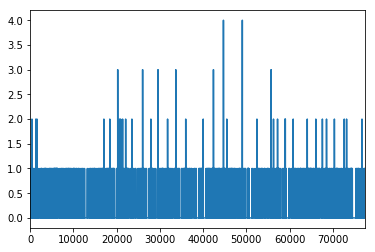

In [53]:
crash_data['fatal_count'].plot()

#### BUT!

* We should also stop and think about what we are looking for and what story or stories we anticipate in the values before diving straight into charts and graphs.


* And here this isn't particularly enlightening or clear. Having said that, it can be warranted to try and visualize every instance (all the rows) like this. And sometimes a picture will give you insight that it difficult to get from a table.


* He we can see that most crashes fortunately did not include fatalities. And that only a two in a 10 year period resulted in 4 deaths in a single crash.


* And compare the plot with this simple table, which tallies the number of rows that contain each number of fatalities.

In [54]:
crash_data['fatal_count'].value_counts()

0    76843
1      582
2       29
3        6
4        2
Name: fatal_count, dtype: int64

* We will learn about a number of other ways to summarize the values in a column of a data frame. 


* Where the values are interval or continuous numbers the `.describe()` function gives a standard statistical summary.

In [55]:
crash_data['fatal_count'].describe()

count    77462.000000
mean         0.008598
std          0.100236
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: fatal_count, dtype: float64

* We will also some sometime looking a __DATA TYPES__ where they are relevant and might affect our data analysis.


* For instance, the `crash_year` field gets treated by Pandas as an _integer_ (i.e. whole number) field.

In [57]:
crash_data['crash_year'].head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: crash_year, dtype: int64

* So while the `.value_counts()` function will gives us a useful summary:

In [66]:
crash_data['crash_year'].value_counts()

2016    12137
2015    11453
2012    11281
2013    11072
2017    11013
2014    10565
2011     9941
Name: crash_year, dtype: int64

* If we use the `.describe()` method then we'll get some strange results

In [58]:
crash_data['crash_year'].describe()

count    77462.000000
mean      2014.068537
std          1.982414
min       2011.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2017.000000
Name: crash_year, dtype: float64

* The _mean_ or average year in the dataset is `2014.068537` - which makes little sense!


* However, note that although the dataset is labeled as 2007-2017 the minimum value is 2011. This is important to know! Don't always trust filenames or descriptions. __CHECK THE DATA YOURSELF__.


* We need to tell Pandas to treat the year values as categories. 

In [61]:
crash_data['crash_year'].astype('category').head(15)

0     2016
1     2016
2     2016
3     2016
4     2016
5     2016
6     2016
7     2016
8     2017
9     2017
10    2017
11    2017
12    2017
13    2017
14    2017
Name: crash_year, dtype: category
Categories (7, int64): [2011, 2012, 2013, 2014, 2015, 2016, 2017]

* And now the results of using `.describe()` are more sensible and useful.

In [65]:
crash_data['crash_year'].astype('category').describe()

count     77462
unique        7
top        2016
freq      12137
Name: crash_year, dtype: int64

### 5. Grouping and aggregating the data

* The next step is often to group and subset a dataset according to certain fields, such as `crash_year`.


* Again Pandas gives us different ways to do this that we learn about.


* The `.groupby(FIELD)` function will split a single `DataFrame` into a number of different ones based on the values of the grouping field or fields.
    * Here we cam see the shape of each of the resulting dataframes by `crash_year`

In [67]:
for year, ydf in crash_data.groupby('crash_year'):
    print(year, ydf.shape)

2011 (9941, 90)
2012 (11281, 90)
2013 (11072, 90)
2014 (10565, 90)
2015 (11453, 90)
2016 (12137, 90)
2017 (11013, 90)


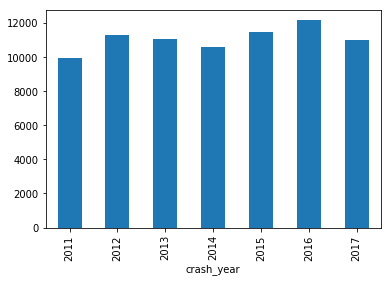

In [72]:
crash_data.groupby('crash_year')['crn'].count().plot(kind='bar')

* So we seem to have a relatively even number of crash events in each year. That is, there are no spikes or troughs and no clear increasing or describe trends.

* We can group by more than one field and then get a count of the number of rows in each combination of, for example, `crash_year` and `crash_month`

In [79]:
crash_data.groupby(['crash_year','crash_month']).count()

wz_ln_closure  objectid_1   crn  district  county  \
crash_year crash_month                                                      
2011       1                      687         687   687       687     687   
           2                      728         728   728       728     728   
           3                      843         843   843       843     843   
           4                      943         943   943       943     943   
           5                      977         977   977       977     977   
           6                      894         894   894       894     894   
           7                      836         836   836       836     836   
           8                      864         864   864       864     864   
           9                      789         789   789       789     789   
           10                     869         869   869       869     869   
           11                     730         730   730       730     730   
           12                     781         781   781       781     781   
2012       1                      885         885   885       885     885   
           2                      837         837   837       837     837   
           3                      973         973   973       973     973   
           4                      979         979   979       979     979   
           5                     1061        1061  1061      1061    1061   
           6                     1004        1004  1004      1004    1004   
           7                      892         892   892       892     892   
           8                      932         932   932       932     932   
           9                      936         936   936       936     936   
           10                    1005        1005  1005      1005    1005   
           11                     853         853   853       853     853   
           12                     924         924   924       924     924   
2013       1                      814         814   814       814     814   
           2                      762         762   762       762     762   
           3                      951         951   951       951     951   
           4                      999         999   999       999     999   
           5                     1056        1056  1056      1056    1056   
           6                     1031        1031  1031      1031    1031   
...                               ...         ...   ...       ...     ...   
2015       7                      994         994   994       994     994   
           8                     1001        1001  1001      1001    1001   
           9                      994         994   994       994     994   
           10                    1075        1075  1075      1075    1075   
           11                     993         993   993       993     993   
           12                    1071        1071  1071      1071    1071   
2016       1                      908         908   908       908     908   
           2                      917         917   917       917     917   
           3                     1010        1010  1010      1010    1010   
           4                     1046        1046  1046      1046    1046   
           5                     1121        1121  1121      1121    1121   
           6                     1063        1063  1063      1063    1063   
           7                      987         987   987       987     987   
           8                     1042        1042  1042      1042    1042   
           9                      990         990   990       990     990   
           10                    1028        1028  1028      1028    1028   
           11                    1067        1067  1067      1067    1067   
           12                     958         958   958       958     958   
2017       1                      841         841   841       841     841   
           2        

* This is a little verbose as it shows these counts for all the columns.


* We can select a single column or group of columns of interest and then sum up the numbers in them.


* For example, here are the numbers of bicycles involved in crashes by year and month.

In [80]:
crash_data.groupby(['crash_year','crash_month'])['bicycle_count'].sum()

crash_year  crash_month
2011        1               3
            2              11
            3              20
            4              28
            5              47
            6              84
            7              61
            8              67
            9              48
            10             52
            11             32
            12             23
2012        1              15
            2              23
            3              56
            4              42
            5              56
            6              66
            7              71
            8              36
            9              47
            10             47
            11             22
            12             28
2013        1              10
            2               8
            3              15
            4              47
            5              59
            6              70
                           ..
2015        7              73
            8   

* This really does lend itself to a visualization!

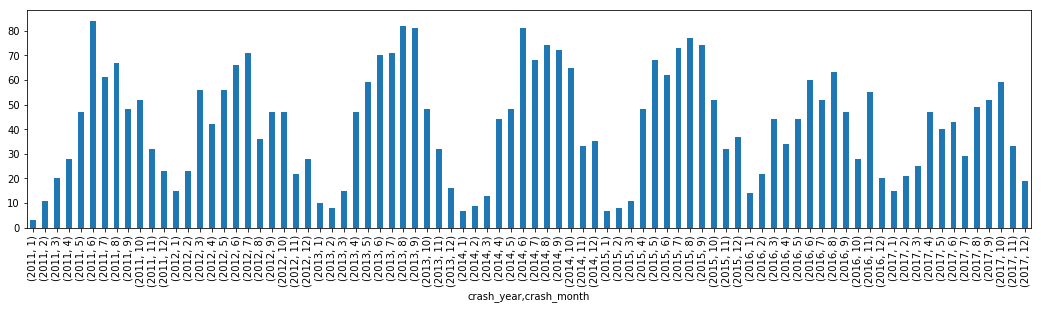

In [82]:
plt.figure(figsize=(18,4))
crash_data.groupby(['crash_year','crash_month'])['bicycle_count'].sum().plot(kind='bar')

#### _Key point__

* Look for patterns in your data!


* These could be __TRENDS__ (an increase or descrease) or __CYCLES__ (repeated up and down patterns), etc.


* These trends and cycles might be associated with other fields. Here is seems like we observe fewer bikes involved in crashes when the weather is colder.

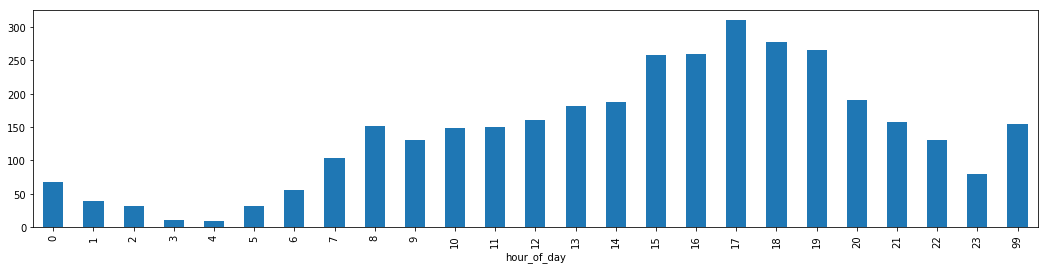

In [83]:
plt.figure(figsize=(18,4))
crash_data.groupby(['hour_of_day'])['bicycle_count'].sum().plot.bar()

* This plot shows bicycles involved in crashes grouped across all the data by the `hour_of_day`


* Definitely seems like a _rush hour_ trend that might be worth investigating.


* Notice also the `99` values. These probably indicate that the time of day was not recorded.

#### We'll finish off with a few other grouping and aggregating examples.


* Deaths of cyclists involved in crashes by year and month.

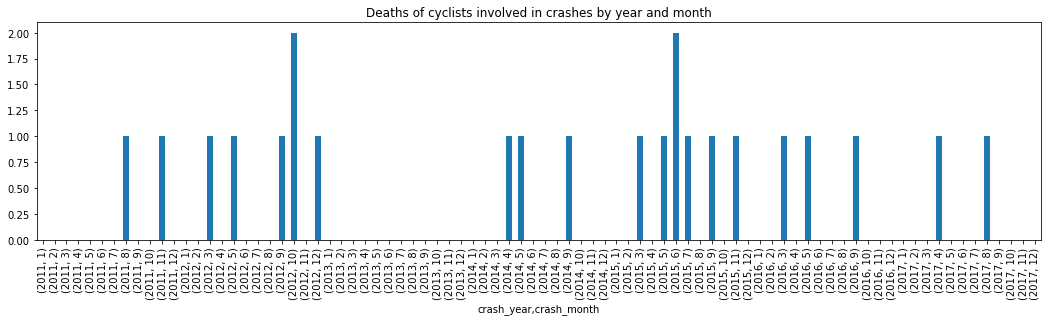

In [97]:
plt.figure(figsize=(18,4))
bike_crash = crash_data[crash_data['bicycle_count']>0]
bike_crash.groupby(['crash_year','crash_month'])['fatal_count'].sum().plot(kind='bar', title='Deaths of cyclists involved in crashes by year and month')

* What is the distribution of fatalities across all types of incident?

In [87]:
crash_data['fatal_count'].value_counts()

0    76843
1      582
2       29
3        6
4        2
Name: fatal_count, dtype: int64

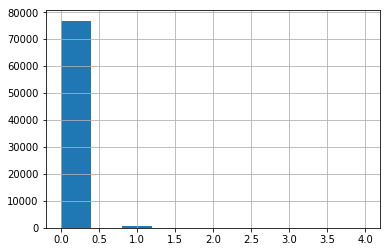

In [99]:
crash_data['fatal_count'].hist()

* Which shows where a table can be clearer than a simple plot.


* Subset the data to find incidents where there were exactly 2 fatalities.

In [88]:
crash_data[crash_data['fatal_count']==2]

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
402,,395,2017038893,6,67,67301,2017,4,6,855,...,0,0,0,0,1,1,40.0265,-75.1151,2,Philadelphia
1298,,1291,2017020754,6,67,67301,2017,2,3,1259,...,0,1,1,0,1,0,40.1052,-74.9934,2,Philadelphia
1571,,1564,2017018990,6,67,67301,2017,1,7,2342,...,0,2,2,0,1,0,40.0330,-75.0802,2,Philadelphia
17048,,17049,2016048698,6,67,67301,2016,4,6,247,...,0,0,0,0,1,0,39.9136,-75.1380,2,
18410,,18411,2016129286,6,67,67301,2016,11,6,1850,...,0,0,0,0,1,0,40.0684,-75.0059,2,
20672,,20673,2016134187,6,67,67301,2016,12,1,2056,...,0,0,0,0,1,1,40.0710,-75.0378,2,
20920,,20921,2016105599,6,67,67301,2016,9,5,1340,...,0,0,0,0,1,0,40.0433,-75.1132,2,
21379,,21380,2016111084,6,67,67301,2016,10,6,25,...,0,0,0,0,1,0,40.0259,-75.1232,2,
22084,,22085,2016087165,6,67,67301,2016,8,1,1355,...,0,0,0,0,1,0,40.0218,-75.1997,2,
23530,,23531,2015056094,6,67,67301,2015,5,7,229,...,0,0,0,0,1,0,39.9594,-75.2453,2,


* Various summaries of the incidents involving bicycles.

In [89]:
crash_data['bicycle_death_count'].value_counts()

0    77440
1       22
Name: bicycle_death_count, dtype: int64

In [90]:
crash_data['bicycle_maj_inj_count'].value_counts()

0    77371
1       91
Name: bicycle_maj_inj_count, dtype: int64

In [91]:
crash_data[crash_data['bicycle_count']>0]['bicycle_death_count'].value_counts()

0    3496
1      22
Name: bicycle_death_count, dtype: int64

In [92]:
crash_data[crash_data['bicycle_count']>0]['bicycle_maj_inj_count'].value_counts()

0    3427
1      91
Name: bicycle_maj_inj_count, dtype: int64

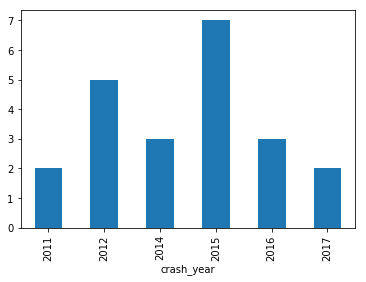

In [100]:
crash_data[(crash_data['bicycle_death_count']>0) ].groupby('crash_year')['bicycle_death_count'].sum().plot(kind='bar')

In [94]:
bicycle_injuries = crash_data[(crash_data['bicycle_death_count']>0) | (crash_data['bicycle_maj_inj_count']>0)]

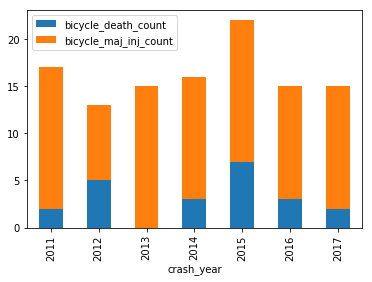

In [95]:
bicycle_injuries.groupby('crash_year')[['bicycle_death_count', 'bicycle_maj_inj_count']].sum().plot(stacked=True, kind='bar')

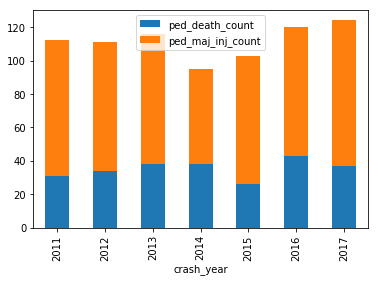

In [96]:
ped_accidents = crash_data[crash_data['ped_count']>0]
ped_accidents.groupby('crash_year')['ped_death_count', 'ped_maj_inj_count'].sum().plot(kind='bar', stacked=True)

## News and other sites

* https://www.phillytrib.com/news/local_news/philly-s-riskiest-deadliest-roads-in-black-and-brown-neighborhoods/article_1d03b88e-2edf-5cbd-9f42-dd5eddf8fedf.html

* https://usa.streetsblog.org/2018/02/12/philadelphias-boulevard-of-death/

* https://billypenn.com/2017/02/06/how-roosevelt-boulevard-became-the-most-dangerous-road-in-philadelphia/

* KnowPA - infoviz example dashboards - http://www.knowpa.com/

### Legal firms citing crash data


> Roosevelt Boulevard, Philadelphia, Pennsylvania
> 
> While the other roads mentioned on this list are highways, Roosevelt Boulevard in Philadelphia is included because of its notoriety as one of the most dangerous thoroughfares in America. The boulevard consists of six 12-foot wide lanes in each direction, and drivers regularly exceed the posted 45 miles per hour and take the road’s dangerous curves far too fast. The boulevard also has two of the nation’s most dangerous intersections, where confused drivers frequently turn into the wrong three-lane stretch of traffic.

https://www.hg.org/legal-articles/5-of-the-most-dangerous-roads-in-the-u-s--32057

> Pennsylvania roads are dangerous, and with its large concentration of population, Philadelphia has the greatest number of crash-related deaths. In fact, according to PennDOT data on fatal car accidents, Philadelphia had more than a quarter of the road segments that were among the state’s most deadly from 2015-2017. During this period, Philly had 24 road segments with 155 total fatal collisions, leading to 167 deaths. This amounted to about a third of the segments with at least four deaths in the entire state.

https://www.wnwlaw.com/philly-four-pennsylvanias-ten-deadliest-roads/


* Study by law firm

https://www.dallashartman.com/blog/2019/01/deadly-roads-pa/